## EXPLORATORY DATA  ANALYSIS ON NETFIX DATASET

### 1. Data Preparation

For the preparations lets first import the necessary libraries and load the file needed for our EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("C:\\Users\\ishit\\Downloads\\archive (7)\\netflix_titles.csv")

In [3]:
#It shows the first five rows of the data
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


The third and final step in the data preparation stage is to look for missing values. Missing values under different columns can add an unwanted skewness to their distribution, making it complicated to analyze. It is always a good practice to filter such values at the very beginning.

In [5]:
data.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [6]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### 2. EDA and Data visualization

Once the data is cleaned and prepped for analysis, we take some of the columns and apply statistical methods to see the underlying picture come to the surface. The following columns have been analyzed in this project- type, country, date added, release year, duration, listed in and directors.

#### Distribution of content

In [7]:
data.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

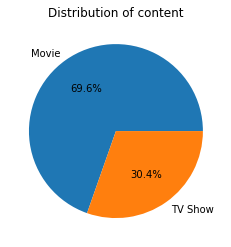

In [8]:
# Lets plot the distribution of content
plt.pie(list(data.type.value_counts()),labels=list(data.type.value_counts().keys()),autopct="%1.1f%%")
plt.title('Distribution of content')
plt.show()

There are more movies than tv shows

#### Top 10 countries by the movies and tv shows

In [9]:
data.country.value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

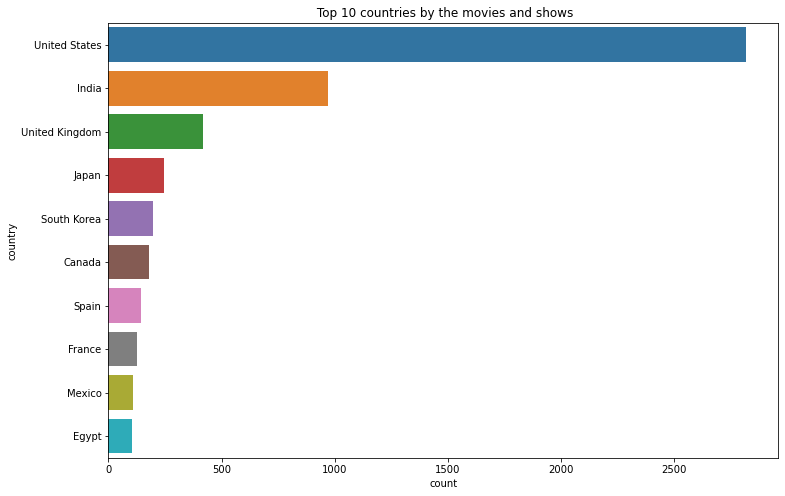

In [69]:
# Lets plot the graph of movies and shows country wise
plt.figure(figsize=(12,8))
sns.countplot(y="country", data=data, order = data.country.value_counts()[:10].index)
plt.title(" Top 10 countries by the movies and shows")
plt.show()

Therefore most of the movies and shows are from united states, India, United Kingdom, Japan and South Korea

#### Top 10 countries by  movies

In [14]:
data_movie=data[data.type=="Movie"]

In [15]:
data_country_movies=data_movie.country.value_counts()

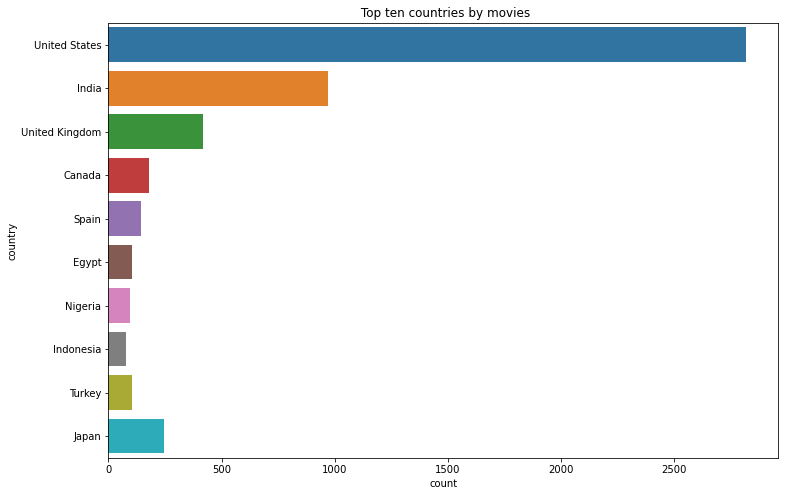

In [17]:
# Plot the graph of movies country-wise
plt.figure(figsize=(12,8))
sns.countplot(y="country", data=data, order = data_country_movies[:10].index)
plt.title(" Top ten countries by movies")
plt.show()

The countries with maximum movies are united states , india followed by united kingdom

#### Top ten countries by  shows

In [18]:
data_show=data[data["type"]=="TV Show"]

In [19]:
data_country_show=data_show.country.value_counts()

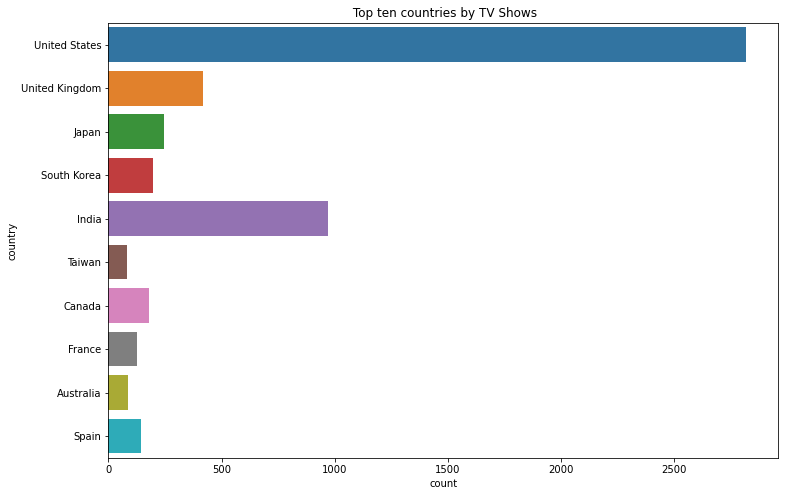

In [20]:
# Lets plot the graph of movies country-wise
plt.figure(figsize=(12,8))
sns.countplot(y="country", data=data, order = data_country_show[:10].index)
plt.title(" Top ten countries by TV Shows")
plt.show()

The countries with maximum tv shows are united states, united kingdom followed by japan. Here India is at 5th position. In movies it is at 2nd position. so we can say that india make more movie than tv series

#### Movies and Tv Shows by Release Year

In [21]:
data_release_year=data.release_year.value_counts()

In [22]:
data_release_year

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

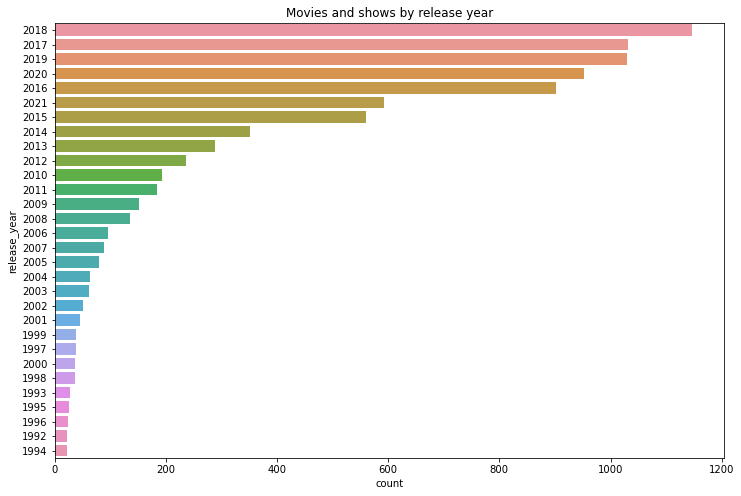

In [71]:
# Graph of movie and tv shows by release year.
plt.figure(figsize=(12,8))
sns.countplot(y="release_year", data=data, order = data_release_year[:30].index)
plt.title("Movies and shows by release year")
plt.show()

Year 2018 marked the highest number of movie and tv show release followed by 2017 and then 2019

####  Rating of movies and tv shows

In [25]:
data_rating=data.rating.value_counts()

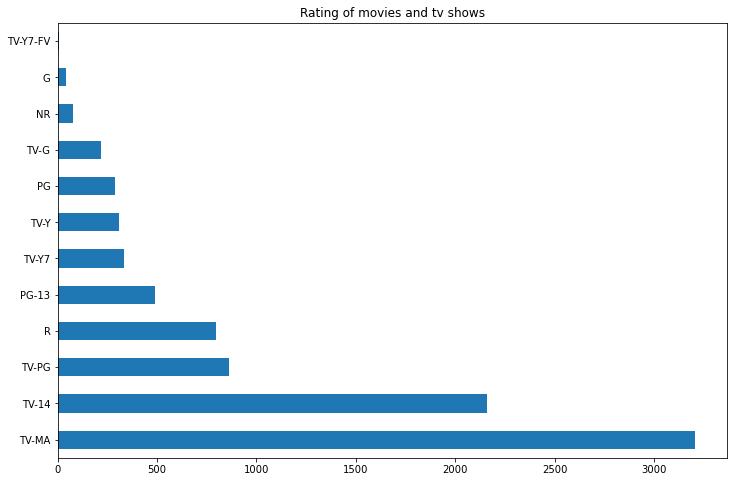

In [26]:
# Graph of rating of movies and shows.
plt.figure(figsize=(12,8))
data_rating[:12].plot(kind="barh")
plt.title("Rating of movies and tv shows")
plt.show()

We can see that TV-MA is the highest means most of the tv shows are for adults (18+)

####  Duration of movies

In [28]:
data_duration_movies=data_movie.duration.value_counts()

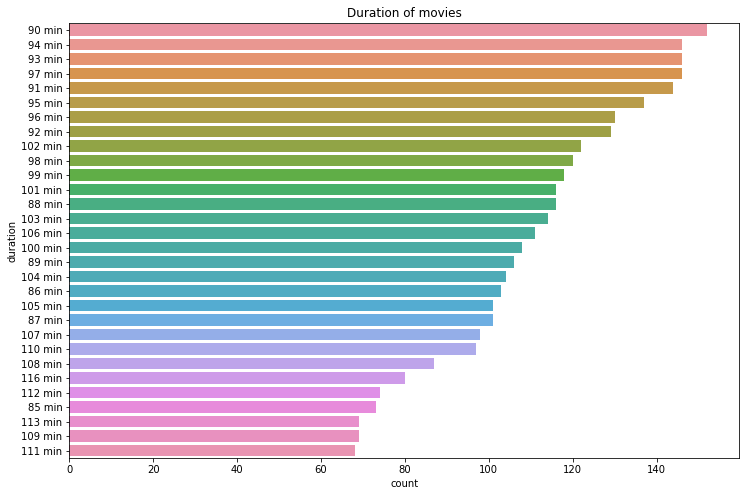

In [72]:
# Lets plot the duration of movies
plt.figure(figsize=(12,8))
sns.countplot(y="duration", data=data, order =data_duration_movies[:30].index)
plt.title("Duration of movies")
plt.show()

Therefore duration of most movies are in the range of 90 to 100 minutes

#### Duration of Tv Shows

In [30]:
data_series_duration=data_show.duration.value_counts()

In [31]:
data_series_duration

1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: duration, dtype: int64

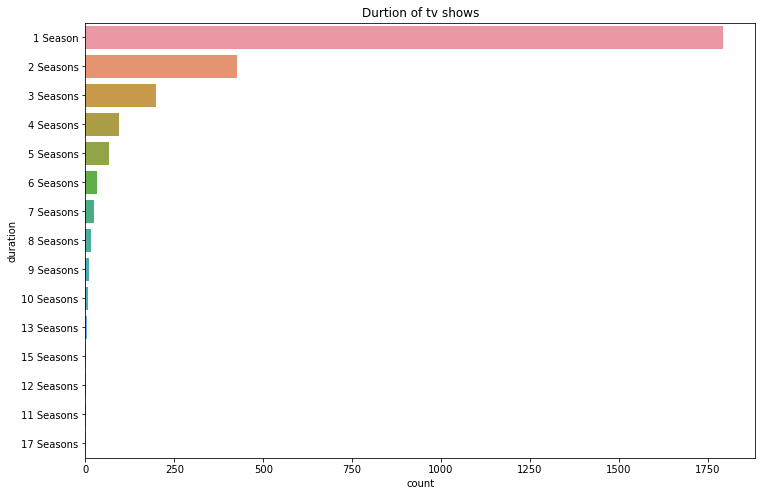

In [74]:
# Lets plot the duration of movies
plt.figure(figsize=(12,8))
sns.countplot(y="duration", data=data, order =data_series_duration.index)
plt.title("Durtion of tv shows")
plt.show()

We can conclude that maximum Tv shows have only season 1.

#### Top 10 Genre

In [34]:
data_listed_in=data.listed_in.value_counts()

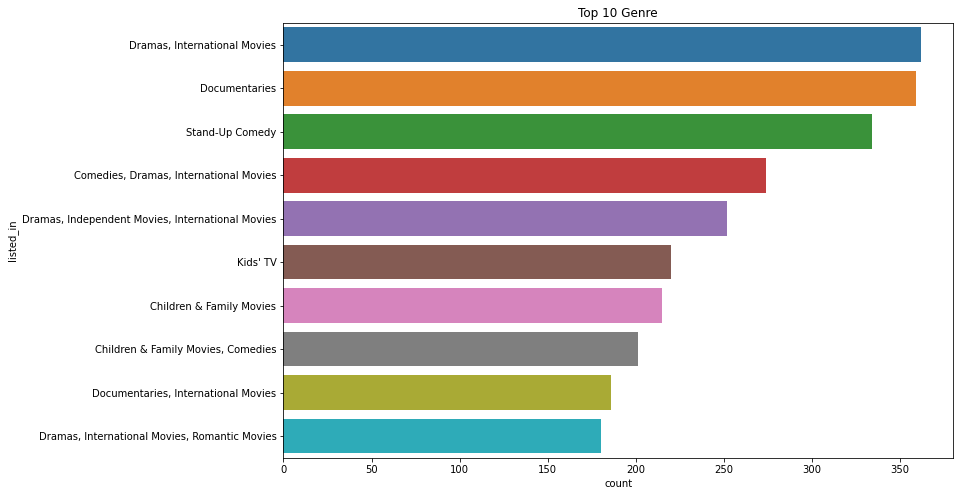

In [36]:
# Lets Plot Top 10 Genre
plt.figure(figsize=(12,8))
sns.countplot(y="listed_in", data=data, order =data_listed_in[:10].index)
plt.title("Top 10 Genre")
plt.show()

Dramas,international movies is the highest followed by Documentaries.

#### Movies and Tv Shows by Date Added on Netflix

In [62]:
data_time=pd.to_datetime(data.date_added)

In [63]:
data_date_added=data_time.dt.year.value_counts()

In [64]:
data_date_added

2019.0    2016
2020.0    1879
2018.0    1649
2021.0    1498
2017.0    1188
2016.0     429
2015.0      82
2014.0      24
2011.0      13
2013.0      11
2012.0       3
2009.0       2
2008.0       2
2010.0       1
Name: date_added, dtype: int64

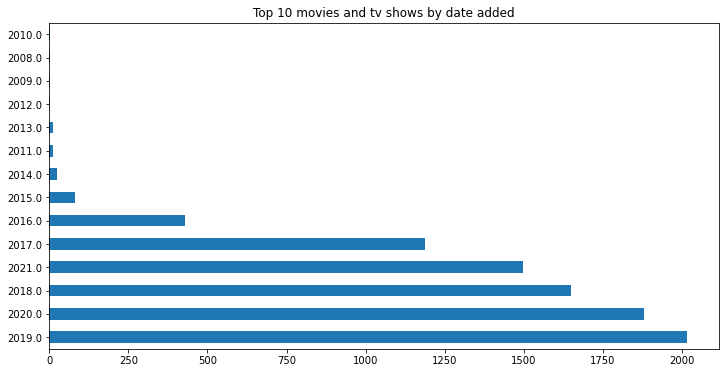

In [65]:
# Movies and tv shows by date added on netflix
plt.figure(figsize=(12,6))
data_date_added.plot(kind="barh")
plt.title("Top 10 movies and tv shows by date added")
plt.show()

So we can see that most of the movies were added in 2019 followed by 2020 and then 2018.

#### Top 10 Directors

In [66]:
data_director=data.director.value_counts()

In [67]:
data_director

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

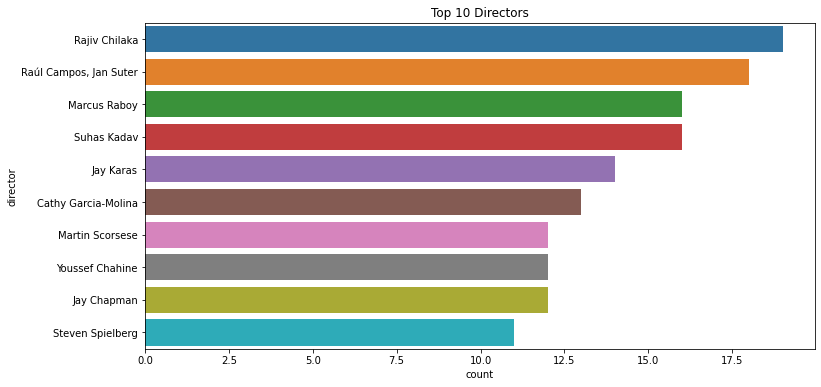

In [73]:
# Lets plot the graph of top 10 directors
plt.figure(figsize=(12,6))
sns.countplot(y="director",data=data, order=data_director[:10].index)
plt.title("Top 10 Directors")
plt.show()

### 3. Conclusion

 1.United States has the most number of tv shows and movies followed by india and united kingdom
 
 2.There are more movies than tv shows
 
 3.Most of the tv shows are for adults (18+)
 
 4.Year 2018 marked the highest number of movie and tv show release followed by 2017 and then 2019
 
 5.Duration of most movies are in the range of 90 to 100 minutes
 
 6.Dramas,international movies is the highest followed by Documentaries.